# Random Forest

# Import necessary libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/airbnb_model_features.csv')
df.head()

,neighbourhood,property_type,room_type,beds,price,review_scores_rating,date_difference
0,1,0,0,1.0,145,92.050565,0
1,1,0,1,1.0,37,92.050565,0
2,2,0,1,1.0,28,92.050565,0
3,2,0,0,3.0,199,92.050565,2622
4,2,0,1,3.0,549,96.000000,2622


In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighbourhood         30478 non-null  int64  
 1   property_type         30478 non-null  int64  
 2   room_type             30478 non-null  int64  
 3   beds                  30478 non-null  float64
 4   price                 30478 non-null  int64  
 5   review_scores_rating  30478 non-null  float64
 6   date_difference       30478 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.6 MB


# Choosing features and target

In [4]:
# define features and target
X = df.drop('price', axis=1)
y =df.price

# Split the dataset into training and test set

In [5]:
# Splitting our dataset our dataset for testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
X_train.shape

(24382, 6)

In [7]:
y_train.shape

(24382,)

# Impement Random Forest Regressor

In [8]:
# initializing the model
model = RandomForestRegressor(n_estimators=100, random_state=42)



In [9]:
# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [13]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [14]:
# Train the model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/chijofareen/envs/ml-env/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, verbose=2)

In [15]:
# Best parameters found by RandomizedSearchCV
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}


# Check feature importance 

In [18]:
feature_importance = pd.Series(best_rf_model.feature_importances_, index=X.columns)

feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

date_difference         0.376865
room_type               0.247547
beds                    0.140418
review_scores_rating    0.104600
neighbourhood           0.087424
property_type           0.043145
dtype: float64

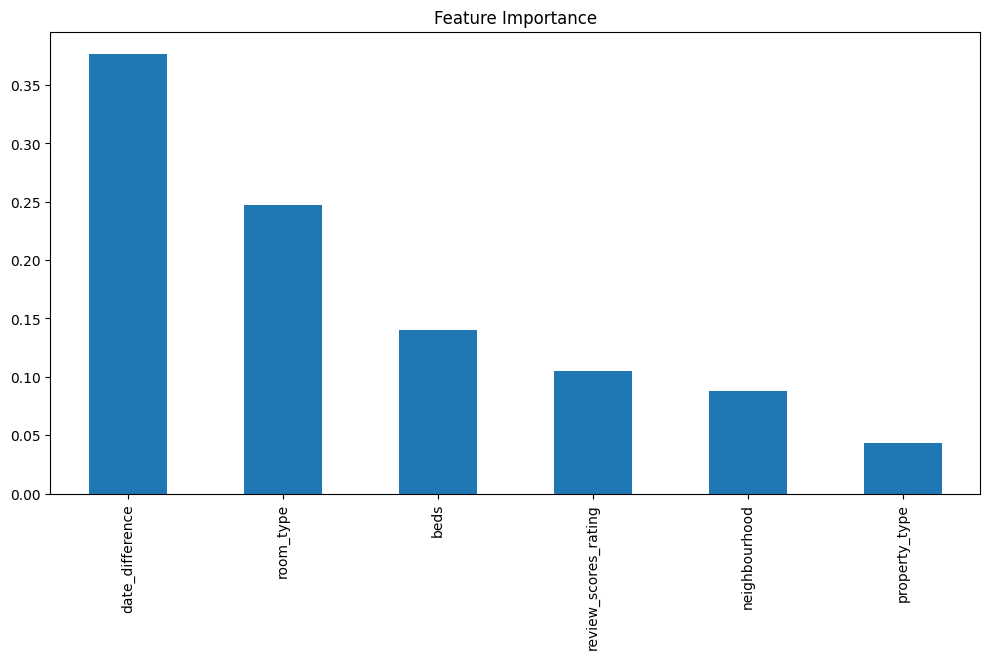

In [19]:
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# Make predictions

In [17]:
# Best estimator
best_rf_model = random_search.best_estimator_

In [20]:
# making predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model

In [21]:
# perfomance evaluation
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(27809.964186978723)

In [22]:
r2 = r2_score(y_test, y_pred)
r2

0.3349302378399137

In [23]:
# comparing predicted vs actual values
price = {'y_true':y_test,'y_pred':y_pred}
pd.DataFrame(price)

,y_true,y_pred
20598,115,85.392757
26799,135,174.835343
2980,74,71.944331
16822,70,120.517186
5042,200,155.833589
...,...,...
20997,150,187.049139
11253,42,80.564803
21626,401,210.969919
1192,137,162.158252


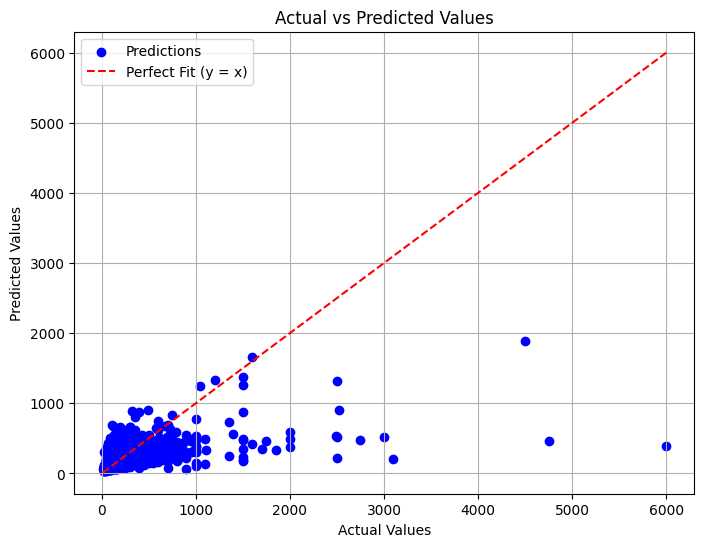

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   9.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  29.8s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  19.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  50.0s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  46.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  52.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   5.4s
[CV] END bootstrap=False, max_depth=10, min_samples_lea

In [24]:
# Plot actual vs predicted  values
# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predictions")
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    label="Perfect Fit (y = x)",
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Next steps:
Use a different Housing dataset using the model